To understand $AUC$, we need some ingredients: <br/> 
- True positive rate (recall): of all actual positives, how many are identified as such? <br/>
- False positive rate: of all actual negatives, how many are identified as positives? <br/>
- A prediction vector, in terms of probabilities <br/>
- A corresponding label vector

In [1]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# make up a label vector and a prediction vector
label = np.array([0,0,1,0,1,1])
prediction = np.array([0.1,0.8,0.3,0.4,0.5,0.6])

In [3]:
# feed the label vector and the prediction vector to the roc_curve function
false_positive_rate, true_positive_rate, thresholds = roc_curve(label, prediction)

**This is how to trace out the ROC curve:** from the prediction vector, select distinct probabilities, order them from large to small. Loop through the probabilities one at a time. At each step, say probability p, use p as the threshold such that for all probabilities higher than p, predict positive, and for all probabilities lower than p, predict negative. Then calculate fpr and tpr. Then plot the point in the (fpr, tpr) space. Move on to the next probability, repeat.

In [4]:
thresholds

array([1.8, 0.8, 0.5, 0.4, 0.3, 0.1])

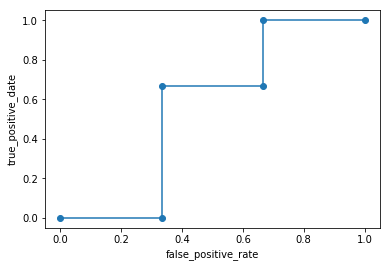

In [5]:
# notice that 0.6 is not included in threshold, because the (fpr, tpr) corresponding to 0.6, which is (1/3, 1/3), 
# is on the vertical segment between (1/3, 0) and (1/3, 2/3). But for ease of understanding, we can imagine that
# all distinct probabilities in the prediction vector are used as thresholds

# the 6 points on this curve correspond to the 6 thresholds, as we move from lower left to upper right, we are lowering
# the thresholds, catching more and more true positives, but risking more and more false positives along the way
plt.plot(false_positive_rate, true_positive_rate, marker = 'o')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_date')
plt.show()

In [6]:
auc = metrics.roc_auc_score(label, prediction)
auc

0.5555555555555556

In [7]:
true_positive_rate

array([0.        , 0.        , 0.66666667, 0.66666667, 1.        ,
       1.        ])

In [8]:
false_positive_rate

array([0.        , 0.33333333, 0.33333333, 0.66666667, 0.66666667,
       1.        ])